In [1]:
# データ加工・処理・分析ライブラリ
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ
import sklearn

# 小数第三位まで表示
%precision 3

'%.3f'

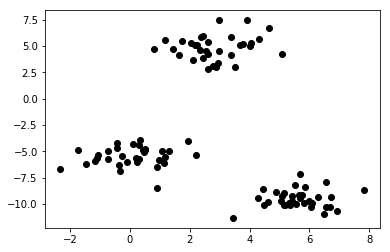

In [2]:
# k-means法を使うためのインポート
from sklearn.cluster import KMeans

# データ取得のためのインポート
from sklearn.datasets import make_blobs

# サンプルデータ生成
X, _ = make_blobs(random_state=10)

# グラフを描画
plt.scatter(X[:,0], X[:,1], color='black')


In [3]:
# KMeansクラスの初期化
kmeans = KMeans(init='random', n_clusters=3)

# クラスターの重心を計算
kmeans.fit(X)

# クラスター番号を予測
y_pred = kmeans.predict(X)


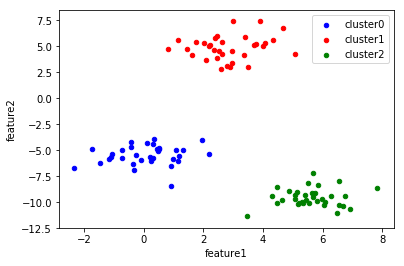

In [4]:
# データを横に結合
merge_data = pd.concat([pd.DataFrame(X[:,0]), pd.DataFrame(X[:,1]), pd.DataFrame(y_pred)], axis=1)
merge_data.columns = ['feature1', 'feature2', 'cluster']

# クラスタリング結果のグラフ化
ax = None
colors = ['blue', 'red', 'green']
for i, data in merge_data.groupby('cluster'):
    ax = data.plot.scatter(x='feature1', y='feature2', color=colors[i],
                          label=f'cluster{i}', ax=ax)


In [5]:
# インポート
import requests, zipfile
import io

# 自動車価格データを取得
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'
res = requests.get(url, stream=True)
z = zipfile.ZipFile(io.BytesIO(res.content))
z.extractall()


In [6]:
# 取得したデータをDataFrameオブジェクトとして読み込み
bank = pd.read_csv('bank-full.csv', sep=';')

In [7]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
print('データ形式（X,y):{}'.format(bank.shape))
print('欠損データの数:{}'.format(bank.isnull().sum().sum()))

データ形式（X,y):(45211, 17)
欠損データの数:0


In [10]:
bank_sub = bank[['age', 'balance', 'campaign', 'previous']]

# 標準化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(bank_sub)
bank_sub_std = sc.transform(bank_sub)

In [11]:
bank_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 4 columns):
age         45211 non-null int64
balance     45211 non-null int64
campaign    45211 non-null int64
previous    45211 non-null int64
dtypes: int64(4)
memory usage: 1.4 MB


In [12]:
bank_sub_std

array([[ 1.607,  0.256, -0.569, -0.252],
       [ 0.289, -0.438, -0.569, -0.252],
       [-0.747, -0.447, -0.569, -0.252],
       ...,
       [ 2.925,  1.43 ,  0.722,  1.05 ],
       [ 1.513, -0.228,  0.399, -0.252],
       [-0.371,  0.528, -0.247,  4.524]])

0    24509
1      221
2     2684
3     1380
4    14734
5     1683
Name: cluster_number, dtype: int64


Text(0, 0.5, 'count')

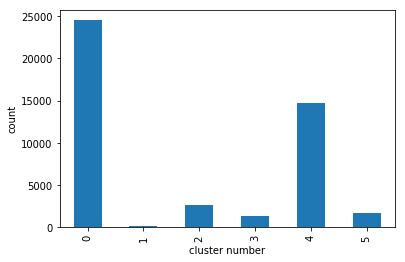

In [26]:
# KMeansクラスの初期化
kmeans = KMeans(init = 'random', n_clusters=6, random_state=0)

# クラスターの重心計算
kmeans.fit(bank_sub_std)

# クラスター番号をpandasのSeriesオブジェクトに変換
labels = pd.Series(kmeans.labels_, name='cluster_number')

# クラスター番号と件数を表示
print(labels.value_counts(sort=False))

# グラフを描画
ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

Text(0, 0.5, 'Distortion')

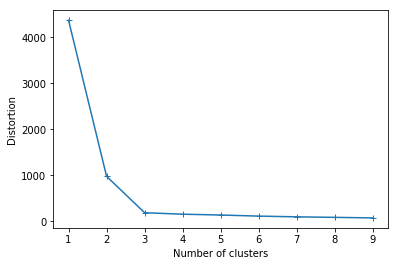

In [27]:
# エルボー法による推定
dist_li =[]
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='random', random_state=0)
    kmeans.fit(X)
    dist_li.append(kmeans.inertia_)
    
# グラフを表示
plt.plot(range(1,10), dist_li, marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

In [28]:
# 金融機関のデータにクラスター番号のデータを結合
bank_with_cluster = pd.concat([bank, labels], axis=1)
bank_with_cluster.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,cluster_number
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,4
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


In [30]:
# 分割のための区切りを設定
bins = [15,20,25,30,35,40,45,50,55,60,65,100]

# 上の区切りをもとに金融機関のデータを分割し、qcut_age変数に各データの年齢層を設定
qcut_age = pd.cut(bank_with_cluster.age, bins, right=False)

# クラスタ番号と年齢層を結合
df = pd.concat([bank_with_cluster.cluster_number, qcut_age], axis=1)

# クラスタ番号と年齢層を軸に集計し、年齢層を列に設定
cross_cluser_age = df.groupby(['cluster_number', 'age']).size().unstack().fillna(0)
cross_cluser_age

age             [15, 20)  [20, 25)  [25, 30)  [30, 35)  [35, 40)  [40, 45)  \
cluster_number                                                               
0                   45.0     711.0    4024.0    8492.0    7146.0    4091.0   
1                    0.0       3.0      10.0      37.0      25.0      26.0   
2                    0.0      14.0     152.0     497.0     517.0     460.0   
3                    0.0      20.0     132.0     327.0     308.0     187.0   
4                    0.0       0.0       0.0       0.0       0.0    1155.0   
5                    2.0      14.0     146.0     387.0     353.0     266.0   

age             [45, 50)  [50, 55)  [55, 60)  [60, 65)  [65, 100)  
cluster_number                                                     
0                    0.0       0.0       0.0       0.0        0.0  
1                   27.0      30.0      38.0      11.0       14.0  
2                  375.0     306.0     263.0      63.0       37.0  
3                  146.0     117.0 

In [33]:
# 分割したデータ数をカウント
hint_age = pd.value_counts(qcut_age)
hint_age

[30, 35)     9740
[35, 40)     8349
[40, 45)     6185
[45, 50)     5470
[50, 55)     4488
[25, 30)     4464
[55, 60)     3922
[60, 65)      974
[65, 100)     810
[20, 25)      762
[15, 20)       47
Name: age, dtype: int64

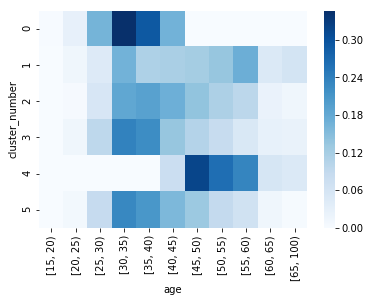

In [35]:
sns.heatmap(cross_cluser_age.apply(lambda x: x/x.sum(), axis=1), cmap='Blues')

In [36]:
cross_cluser_job = bank_with_cluster.groupby(['cluster_number', 'job']).size().unstack().fillna(0)
cross_cluser_job

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
cluster_number,,,,,,,,,,,,
0,3097,5610,728,426,5130,57,852,2564,813,4459,698,75
1,15,12,19,7,91,24,11,9,3,21,6,3
2,219,459,91,70,788,111,130,189,48,460,99,20
3,196,244,42,22,332,53,41,112,52,250,31,5
4,1467,3040,543,675,2732,1984,479,1124,4,2084,439,163
5,177,367,64,40,385,35,66,156,18,323,30,22


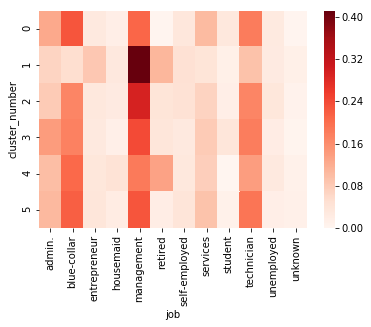

In [38]:
sns.heatmap(cross_cluser_job.apply(lambda x: x/x.sum(), axis=1), cmap='Reds')

In [39]:
'''
練習問題9-1
'''

from sklearn.datasets import make_blobs

data = make_blobs(random_state=52)


In [46]:
zero_df = pd.DataFrame(data[0], columns={"data1", "data2"})
one_df = pd.DataFrame(data[1], columns={"data3"})

In [49]:
calc_df = pd.concat([zero_df, one_df], axis=1)

In [51]:
# 標準化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(calc_df)
calc_df_std = sc.transform(calc_df)

0    34
1    66
Name: cluster_number, dtype: int64


Text(0, 0.5, 'count')

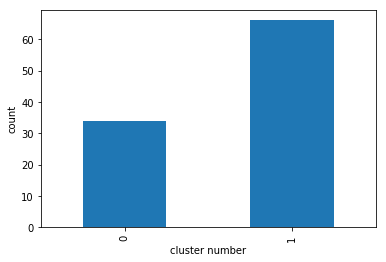

In [60]:
# KMeansクラスの初期化
kmeans = KMeans(init = 'random', n_clusters=2, random_state=0)

# クラスターの重心計算
kmeans.fit(calc_df_std)

# クラスター番号をpandasのSeriesオブジェクトに変換
labels = pd.Series(kmeans.labels_, name='cluster_number')

# クラスター番号と件数を表示
print(labels.value_counts(sort=False))

# グラフを描画
ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

Text(0, 0.5, 'Distortion')

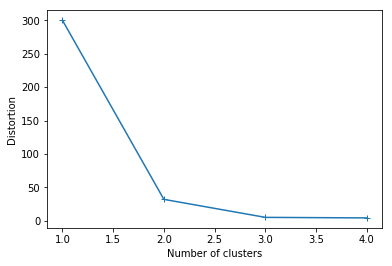

In [55]:
# エルボー法による推定
dist_li =[]
for i in range(1,5):
    kmeans = KMeans(n_clusters=i, init='random', random_state=0)
    kmeans.fit(calc_df_std)
    dist_li.append(kmeans.inertia_)
    
# グラフを表示
plt.plot(range(1,5), dist_li, marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

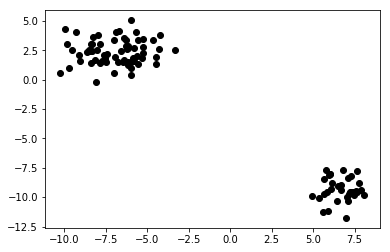

In [57]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=52)
plt.scatter(X[:,0], X[:,1], color='black')

0    34
1    66
Name: cluster_number, dtype: int64


Text(0, 0.5, 'count')

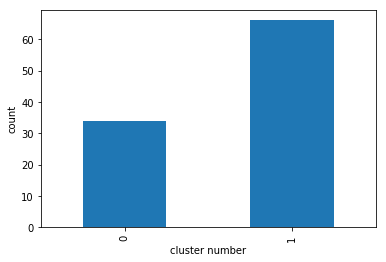

In [61]:
# KMeansクラスの初期化
kmeans = KMeans(init = 'random', n_clusters=2, random_state=0)

# クラスターの重心計算
kmeans.fit(X)

# クラスター番号をpandasのSeriesオブジェクトに変換
labels = pd.Series(kmeans.labels_, name='cluster_number')

# クラスター番号と件数を表示
print(labels.value_counts(sort=False))

# グラフを描画
ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

In [62]:
# クラスター番号を予測
y_pred = kmeans.predict(X)

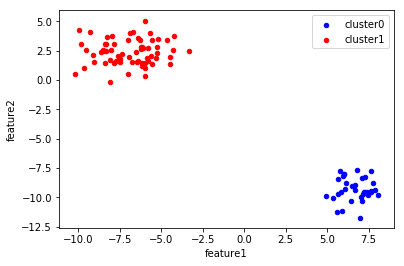

In [63]:
# データを横に結合
merge_data = pd.concat([pd.DataFrame(X[:,0]), pd.DataFrame(X[:,1]), pd.DataFrame(y_pred)], axis=1)
merge_data.columns = ['feature1', 'feature2', 'cluster']

# クラスタリング結果のグラフ化
ax = None
colors = ['blue', 'red', 'green']
for i, data in merge_data.groupby('cluster'):
    ax = data.plot.scatter(x='feature1', y='feature2', color=colors[i],
                          label=f'cluster{i}', ax=ax)